# Using solvers in Python 

This note will cover how to use two types of solvers:  root finders and minimizers.

## Root finding

You have a function

$$
f(x)=\tan(x-g) - x^2 + v
$$
with $g = 1,v=1.8$.

Plot the function

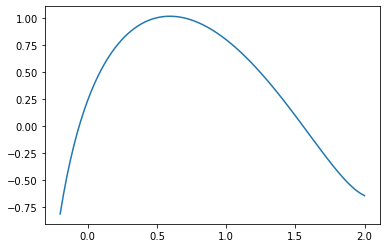

In [3]:
import matplotlib.pyplot as plt
import numpy as np
g = 1
v=1.8
f = lambda x: np.tan((x-g)) - x**2 + v

xs = np.linspace(-.2,2,90) #plot 30 xs from 0.02 to 8
ys = f(xs)
plt.plot(xs,ys)

We can see the function has a root somewhere close to zero and another one out around 1.5. Let's calculate the second root.

In [4]:
from scipy.optimize import root_scalar #this works only for scalar functions
res = root_scalar(f,x0=1.5,bracket=(1.0,2.0))
print(res)
print(res.root)
print(f(res.root)) #this is about zero

      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 1.5561478548711563
1.5561478548711563
-8.770761894538737e-14


## 1-D minimization
Suppose you have a complication function like

$$
f(x)=x \alpha + \frac{\beta}{x} + w^{-x}x
$$
with $\alpha = 0.5,\beta=2.0,w=2$.

Plot the function

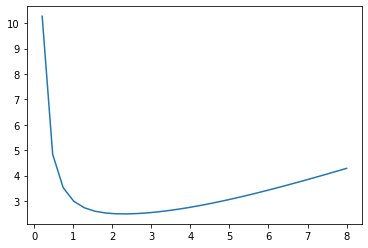

In [5]:
import matplotlib.pyplot as plt
import numpy as np
α = 0.5
β = 2.
w = 2.
f = lambda x: x*α +β/x + w**(-x)*x

xs = np.linspace(.2,8,30)
ys = f(xs)
plt.plot(xs,ys)

We  can see the is a minimum somewhere between $x=1$ and $x=3$.

In [6]:
from scipy.optimize import minimize_scalar
res =minimize_scalar(f, bounds=(1, 3), method='bounded')
res

     fun: 2.4866074267908407
 message: 'Solution found.'
    nfev: 10
  status: 0
 success: True
       x: 2.2953721472986697

So the minimum  is about 2.5 and it occurs at about 2.3.

# Maximizing profit

You have a demand function 
$$X(p) = 10 - 2p,$$
where \(p\) is price. And total cost function
$$TC(x) = 2 + 1.5x.$$

You want to maximize profit.

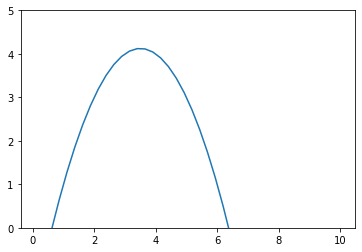

In [16]:
#start out by creating the functions
X = lambda p: 10 - 2*p #demand
P = lambda x: .5*(10-x) #inverse demand, with x as demand
TC = lambda x: 2+1.5*x #total cost
TR = lambda x: x*P(x) #total revenue
π = lambda x: TR(x) - TC(x) #profit

# now plot
xs = np.linspace(.1,10,40)
πs = π(xs)
plt.plot(xs,πs)
plt.ylim(0,5)

#now calculcate where the profit is maximized by minimumizing the *negative* of profit
res =minimize_scalar(lambda x: -π(x), bounds=(2, 6), method='bounded')

In [20]:
print("So the profit-maximizing quantity is {:.2f}".format(res.x))
print("and the profit-maximizing price is {:.2f}".format(P(res.x)))

So the profit-maximizing quantity is 3.50
and the profit-maximizing price is 3.25
